<a href="https://colab.research.google.com/github/HARSHAZGREAT/Databytetast1/blob/main/farepred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import csv
from google.colab import drive
import seaborn as sns
import cv2

In [ ]:
drive.mount("/content/gdrive",  force_remount=True)
train_path = '/content/gdrive/My Drive/ML datasets/Fare_data/Train_fare.xlsx'
test_path = '/content/gdrive/My Drive/ML datasets/Fare_data/test_fare.xlsx'
os.listdir('/content/gdrive/My Drive/ML datasets/Fare_data/')

df1 = pd.read_excel(train_path)
df2 = pd.read_excel(test_path)

Mounted at /content/gdrive


In [ ]:
data = df1.values
data_test = df2.values
Epoch = []
Accuracy = []
Loss = []
weights = []

In [ ]:
df1.head(3)

,trip_duration,distance_traveled,distance_traveled.1,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,771,2.87,2.75,1,75.00,24,6.300,105.300,0
1,1210,3.55,3.43,1,105.00,24,13.200,142.200,0
2,753,3.24,3.12,1,71.25,0,26.625,97.875,1


In [ ]:
df2.head(3)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076,4.18,1,0,0,13.5,0,0
1,429,1.48,4,0,0,13.5,0,0
2,856,4.15,1,0,24,6.0,0,0


In [ ]:
df1.info()
df2.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_duration        209673 non-null  int64  
 1   distance_traveled    209673 non-null  float64
 2   distance_traveled.1  209673 non-null  float64
 3   num_of_passengers    209673 non-null  int64  
 4   fare                 209673 non-null  float64
 5   tip                  209673 non-null  int64  
 6   miscellaneous_fees   209673 non-null  float64
 7   total_fare           209673 non-null  float64
 8   surge_applied        209673 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 14.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89861 entries, 0 to 89860
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       89861 non-null  int64  
 1   distance_traveled 

,trip_duration,distance_traveled,distance_traveled.1,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1196.181478,5.174431,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,23.000000,0.140000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,469.000000,2.070000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,730.000000,3.320000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1121.000000,5.850000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86410.000000,57284.030000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [ ]:
'''
mean_value = df1[['distance_traveled', 'distance_traveled.1']].mean()
print(mean)
df_r = df1.drop('distance_traveled', axis=1)
df_re = df_r.drop('distance_traveled.1', axis=1)
#df_rev = df_re.insert(2, 'distance_traveled', mean_value)
'''


"\nmean_value = df1[['distance_traveled', 'distance_traveled.1']].mean()\nprint(mean)\ndf_r = df1.drop('distance_traveled', axis=1)\ndf_re = df_r.drop('distance_traveled.1', axis=1)\n#df_rev = df_re.insert(2, 'distance_traveled', mean_value)\n"

In [ ]:
mean_value = df1[['distance_traveled', 'distance_traveled.1']].mean()

# Update the columns with the mean value
df1['distance_traveled'] = mean_value[0]
df1['distance_travled.1'] = mean_value[1]

df1

,trip_duration,distance_traveled,distance_traveled.1,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,distance_travled.1
0,771,5.174431,2.75,1,75.00,24,6.300,105.300,0,5.054431
1,1210,5.174431,3.43,1,105.00,24,13.200,142.200,0,5.054431
2,753,5.174431,3.12,1,71.25,0,26.625,97.875,1,5.054431
3,694,5.174431,5.63,3,90.00,0,9.750,99.750,0,5.054431
4,352,5.174431,2.09,1,45.00,12,13.200,70.200,0,5.054431
...,...,...,...,...,...,...,...,...,...,...
209668,1640,5.174431,8.42,1,150.00,47,5.800,202.800,0,5.054431
209669,461,5.174431,1.29,1,48.75,12,34.575,95.325,1,5.054431
209670,594,5.174431,2.82,1,63.75,0,6.000,69.750,0,5.054431
209671,514,5.174431,2.16,1,56.25,0,13.500,69.750,0,5.054431


<Axes: xlabel='trip_duration', ylabel='count'>

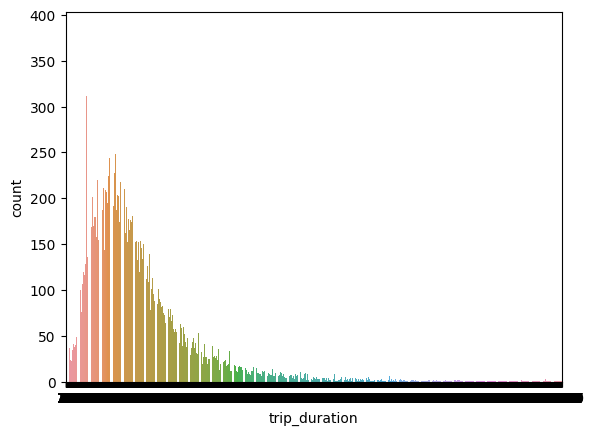

In [ ]:
sns.countplot(x=df1['trip_duration'])